# Medical Treatment

<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/luisangelmendozavelasco.github.io/blob/master/_portfolio/IBM_AI_Engineering/portfolio-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>

**Objective**: Build a Decision Tree classifier to find out which drug might be appropriate for a future patient with the same illness.


A [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree_learning) classifier is a type of supervised learning algorithm used for classification tasks in machine learning. It is a non-parametric method that creates a tree-like model of decisions, where each internal node represents a feature or attribute, and each leaf node represents a class label or predicted outcome.

## Import libaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
sns.set_style("whitegrid")

## Load the dataset

In [3]:
file_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
df = pd.read_csv(file_url)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Understand the dataset

A medical researcher has collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug C, Drug X and Y. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## Visualize the dataset

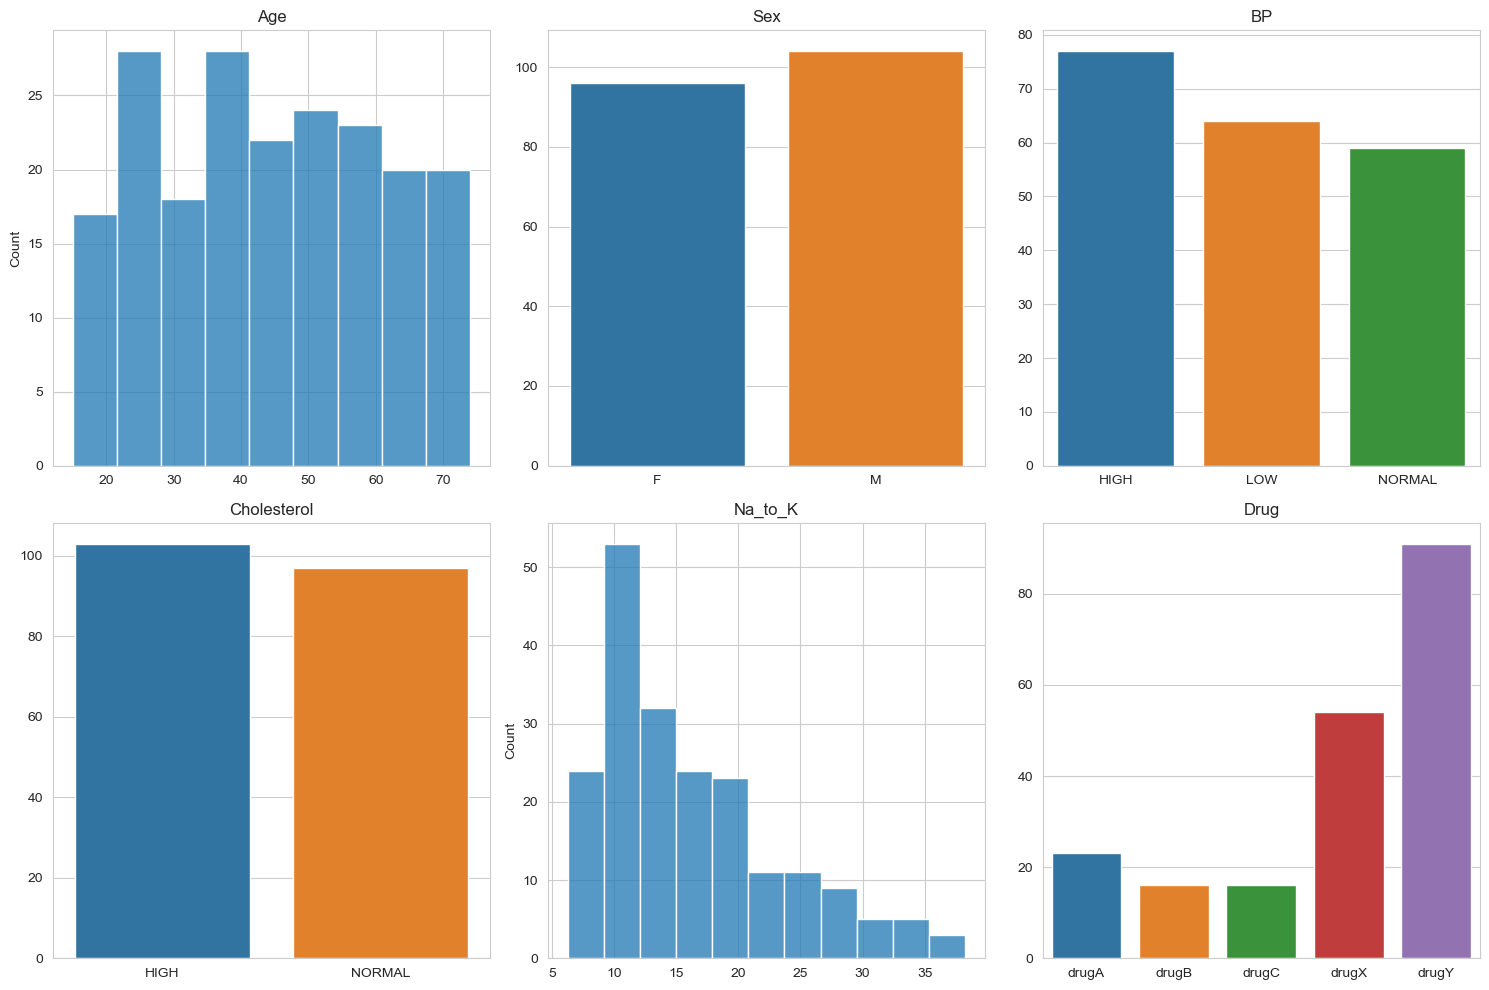

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for ax, feature in zip(axs.flatten(), df.columns):
    if df[feature].dtype == 'O':
        labels, sizes = np.unique(df[feature], return_counts=True)
        sns.barplot(x=labels, y=sizes, hue=labels, ax=ax, palette="tab10", legend=False)
        ax.set_xlabel("")
        ax.set_title(feature)  
    else:
        sns.histplot(data=df, x=feature, ax=ax)
        ax.set_xlabel("")
        ax.set_title(feature)

plt.tight_layout()
plt.show()

## Visualize the class distribution

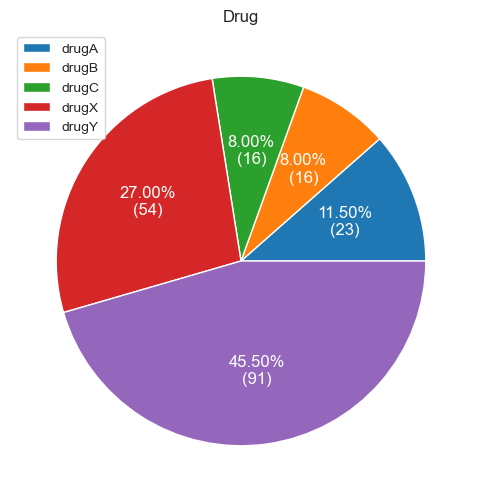

In [6]:
labels, sizes = np.unique(df["Drug"], return_counts=True)

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, textprops={'color': "w", 'fontsize': '12'}, autopct=lambda pct: "{:.2f}%\n({:d})".format(pct, round(pct/100 * sum(sizes))))
ax.legend(labels)
ax.set_title("Drug")
plt.show()

## Preprocess the dataset

Some features in this dataset are categorical. Sklearn Decision Tree classifier does not handle categorical variables, so we need to convert these features to numerical values.

In [7]:
X = df.drop("Drug", axis=1)
y = df["Drug"]

for feature in X.columns:
    if X[feature].dtype == 'O':
        encoder = LabelEncoder()
        X[feature] = encoder.fit_transform(X[feature])

X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


## Split the dataset into training and test sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (150, 5)
X_test shape: (50, 5)


## Train a Decision Tree classifier

In [9]:
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Evaluate the model

              precision    recall  f1-score   support

       drugA     1.0000    1.0000    1.0000         5
       drugB     1.0000    1.0000    1.0000         1
       drugC     1.0000    1.0000    1.0000         3
       drugX     1.0000    1.0000    1.0000        16
       drugY     1.0000    1.0000    1.0000        25

    accuracy                         1.0000        50
   macro avg     1.0000    1.0000    1.0000        50
weighted avg     1.0000    1.0000    1.0000        50



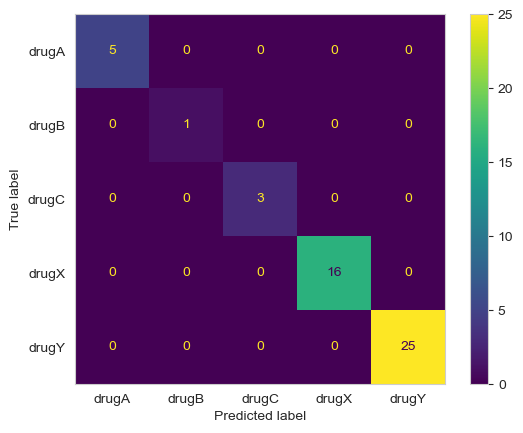

In [10]:
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()

## Visualize the Decision Tree classifier

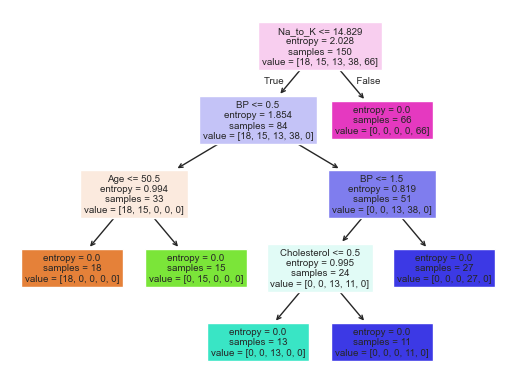

In [11]:
plot_tree(classifier, filled=True, feature_names=X.columns)
plt.show()